Desafio:

Detecção de anomalias em imagens médicas usando
CNN

Contexto:

A detecção automática de anomalias em imagens médicas, como raios-X, ressonância
magnética e tomografias, é uma área de pesquisa em rápido crescimento no campo da saúde. A
detecção de anomalias pode auxiliar os médicos a identificar doenças como tumores, fraturas
ou outras condições médicas anormais de maneira mais rápida e precisa

Objetivo:

Desenvolver um modelo de CNN que possa detectar anomalias em um conjunto de dados de
imagens médicas. O modelo deve ser capaz de identificar e localizar a anomalia na imagem,
bem como classificar o tipo de anomalia (se possível).

Coleta de Dados:

O dataset ChestX-ray compreende 112.120 imagens de raios-X de vista frontal de 30.805
pacientes, com quatorze rótulos de doenças identificados por mineração de texto (onde cada
imagem pode ter múltiplos rótulos), extraídos dos respectivos relatórios radiológicos usando
processamento de linguagem natural. As quatorze patologias torácicas comuns incluem
Atelectasia, Consolidação, Infiltração, Pneumotórax, Edema, Enfisema, Fibrose,
Efusão, Pneumonia, Espessamento Pleural, Cardiomegalia, Nódulo, Massa e Hérnia , o que
é uma extensão dos 8 padrões de doenças comuns listados no artigo do CVPR2017. Observe
que os relatórios de radiologia originais (associados a esses estudos de raios-X do tórax) não
são destinados a ser compartilhados publicamente por muitos motivos. Espera-se que os
rótulos de doenças extraídos por mineração de texto tenham precisão superior a 90%. Encontre
mais detalhes e desempenho de referência de modelos treinados baseados em 14 rótulos de
doenças em nosso artigo no arXiv: 1705.02315.
Os dados de imagens médicas são publicos e estão disponibilizados em:
https://nihcc.app.box.com/v/ChestXray-NIHCC

Licença e atribuição

Não há restrições de uso das imagens de radiografia de tórax da NIH. No entanto, o conjunto de
dados tem os seguintes requisitos de atribuição:
Forneça um link para o site de download da NIH: https://nihcc.app.box.com/v/ChestXrayNIHCC
Inclua uma citação no documento CVPR 2017:

Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers,

Desenvolvimento:

Como referência para o inicio do seu desenvolvimento, utlize o o repositório:
https://github.com/anshuak100/NIH-Chest-X-ray-Dataset/tree/master (esse repositório serve
apenas como guia inicial e não deve ser utilizado como parte da sua solução.)
Siga as etapas de desenvolvimento como as ferramentas do KDD-Process ou CRISP-DM , isso
inclui as etapas:
Entendimento de negocio: conhecer o conjunto de dados e o problema a ser resolvido;
pre-processamento: Tecnicas de normalização dentre outras;
Arquitetura da CNN: Desenvolver uma arquitetura CNN adequada para a detecção de
anomalias. Começar com arquiteturas famosas, como VGG, ResNet, etc., e adaptá-las
conforme necessário;
Treinamento: Dividir o conjunto de dados em treinamento, validação e teste. Treinar o
modelo usando o conjunto de treinamento e validar usando o conjunto de validação.
Implementar técnicas de regularização, como dropout ou regularização L2, para evitar
overfitting.
Avaliação: Avaliar o modelo no conjunto de teste usando métricas como precisão, recall, F1-
score e AUC-ROC. Visualizar as regiões da imagem onde a rede está mais atenta (usando
técnicas como mapas de calor).
Otimização: Otimizar o modelo com base nos resultados da avaliação. Experimentar
diferentes arquiteturas, hiperparâmetros ou técnicas de pré-processamento para melhorar
o desempenho.

Apresentação:

Video técnico de no máximo 3min. Apresentação detalhando sua abordagem, resultados e
conclusões.
Considerar as implicações éticas do uso de IA em diagnósticos médicos.
Compartilhar os desafios enfrentados e como eles foram superados.

Rubrica de Avaliação:

Compreensão do Problema (20%): Capacidade de entender e articular o problema de
detecção de anomalias em imagens médicas.
Qualidade do Modelo (30%): Eficácia do modelo em termos de métricas escolhidas
(precisão, sensibilidade, etc.).
Inovação e Criatividade (20%): Habilidade em experimentar com diferentes arquiteturas e
técnicas.
Documentação e Apresentação (15%): Qualidade da documentação (jupyter notebook)do
projeto e a clareza na apresentação dos resultados.
Reflexão Crítica (15%): Capacidade de refletir criticamente sobre os resultados, limitações e
possíveis melhorias do modelo

Dicas:

Usar as bibliotecas TensorFlow, Keras para implementar a CNN;
Explorar o site: https://datasets.activeloop.ai/docs/ml/datasets/nih-chest-x-ray-dataset/
Experimentar técnicas como transfer Learning, usando modelos pré-treinados e
adaptando-os para esta tarefa específica

Entrega:

Submeter no portal de entrega um arquivo .txt contendo:
Nome dos integrantes;
Link para o video de apresentação do projeto;
Link para o jupyter notebook do projeto (google colab ou github)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

In [14]:
df = pd.read_csv('Data_Entry_2017_v2020.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


In [15]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.626365,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.602680,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,0.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,34.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


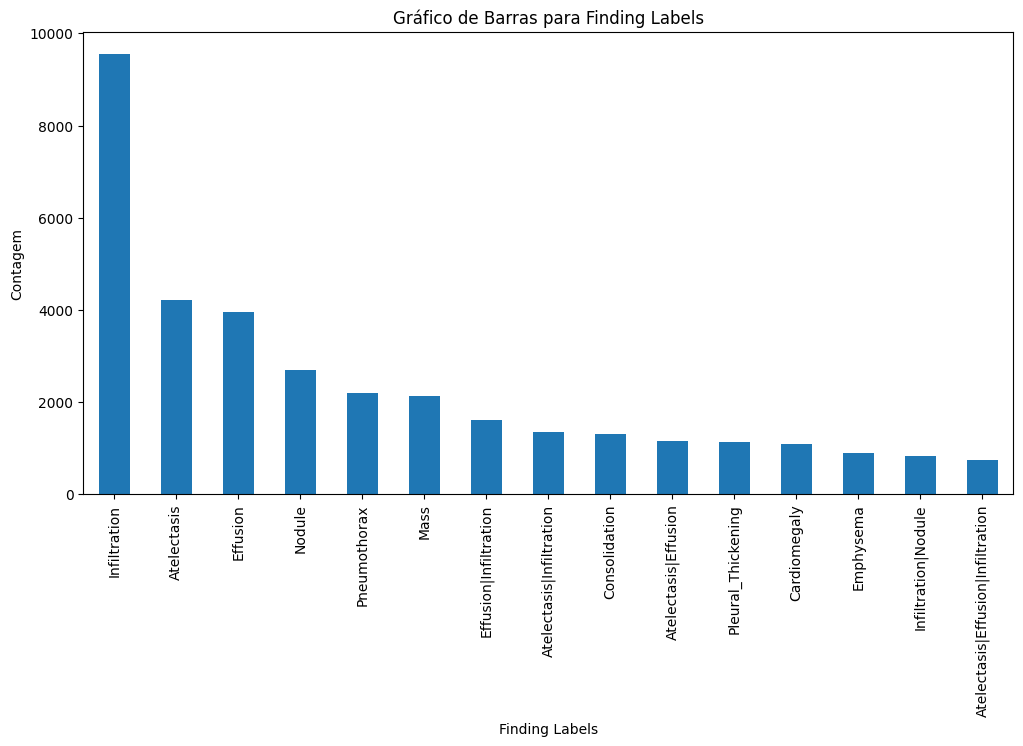

In [18]:

df_allfindings = df[df['Finding Labels'] != 'No Finding']
contagem_ocorrencias = df_allfindings['Finding Labels'].value_counts()[:15]

plt.figure(figsize=(12, 6))
contagem_ocorrencias.plot(kind='bar')
plt.title('Gráfico de Barras para Finding Labels')
plt.xlabel('Finding Labels')
plt.ylabel('Contagem')
plt.show()

In [19]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")





downloadingimages_01.tar.gz...
Download complete. Please check the checksums


In [20]:
import tarfile
import os

# Diretório de origem
diretorio_origem = "/content"

# Diretório de destino para extração
diretorio_destino = "/content/images_Xray/"

# Crie o diretório de destino se ele não existir
os.makedirs(diretorio_destino, exist_ok=True)

# Crie um loop para percorrer cada arquivo no diretório de origem
for arquivo in os.listdir(diretorio_origem):
    # Verifique se o arquivo é um .tar.gz
    if arquivo.endswith(".tar.gz"):
        # Caminho completo para o arquivo
        caminho_arquivo = os.path.join(diretorio_origem, arquivo)

        # Extraia o conteúdo do arquivo .tar.gz para o diretório de destino
        with tarfile.open(caminho_arquivo, 'r:gz') as tar:
            tar.extractall(diretorio_destino)

        print(f"Arquivo {arquivo} extraído para {diretorio_destino}")

Arquivo images_01.tar.gz extraído para /content/images_Xray/


In [21]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.util import montage as montage2d
from skimage.io import imread


In [22]:
all_xray_df = pd.read_csv('/content/Data_Entry_2017_v2020.csv')
all_image_paths = {os.path.basename(x): x for x in
                   glob(os.path.join('/content', 'images_Xray','images' ,'*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)

all_xray_df = all_xray_df.dropna(subset=['path'])

all_xray_df.sample(20)


Scans found: 4999 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
147,00000032_033.png,Infiltration,33,32,54,F,AP,2500,2048,0.168000,0.168000,/content/images_Xray/images/00000032_033.png
4895,00001304_004.png,No Finding,4,1304,44,M,AP,2500,2048,0.168000,0.168000,/content/images_Xray/images/00001304_004.png
1132,00000278_001.png,Pleural_Thickening,1,278,52,M,PA,2500,2048,0.171000,0.171000,/content/images_Xray/images/00000278_001.png
1425,00000372_003.png,Pneumothorax,3,372,79,M,PA,2500,2048,0.168000,0.168000,/content/images_Xray/images/00000372_003.png
1125,00000275_002.png,Atelectasis,3,275,60,F,AP,3056,2544,0.139000,0.139000,/content/images_Xray/images/00000275_002.png
801,00000193_016.png,No Finding,16,193,54,M,AP,2500,2048,0.171000,0.171000,/content/images_Xray/images/00000193_016.png
4922,00001315_004.png,Atelectasis|Infiltration,4,1315,44,M,AP,2500,2048,0.168000,0.168000,/content/images_Xray/images/00001315_004.png
792,00000193_007.png,No Finding,7,193,54,M,AP,2500,2048,0.171000,0.171000,/content/images_Xray/images/00000193_007.png
1375,00000360_004.png,Emphysema,4,360,45,M,AP,2500,2048,0.168000,0.168000,/content/images_Xray/images/00000360_004.png
4372,00001190_002.png,Consolidation,2,1190,23,M,PA,2992,2991,0.143000,0.143000,/content/images_Xray/images/00001190_002.png


In [23]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


<ipython-input-23-8568907b4f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
<ipython-input-23-8568907b4f3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
<ipython-input-23-8568907b4f3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
2261,00000583_052.png,Atelectasis|Consolidation,51,583,40,F,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1949,00000502_006.png,Pneumothorax,6,502,42,M,AP,2500,2048,0.171000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4476,00001209_001.png,Effusion|Infiltration,1,1209,45,M,PA,2021,2021,0.194311,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (0) []


In [25]:

all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: x[all_labels].values.tolist(), axis=1)


In [26]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df,
                                   test_size = 0.25,
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 3749 validation 1250


In [27]:
valid_df['doencas'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['doencas'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [28]:

from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [29]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'doencas',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'doencas',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation

train_X, train_Y = next(core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'doencas',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'doencas',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

Found 3749 validated image filenames belonging to 15 classes.
Found 1250 validated image filenames belonging to 15 classes.
Found 3749 validated image filenames belonging to 15 classes.
Found 1250 validated image filenames belonging to 15 classes.


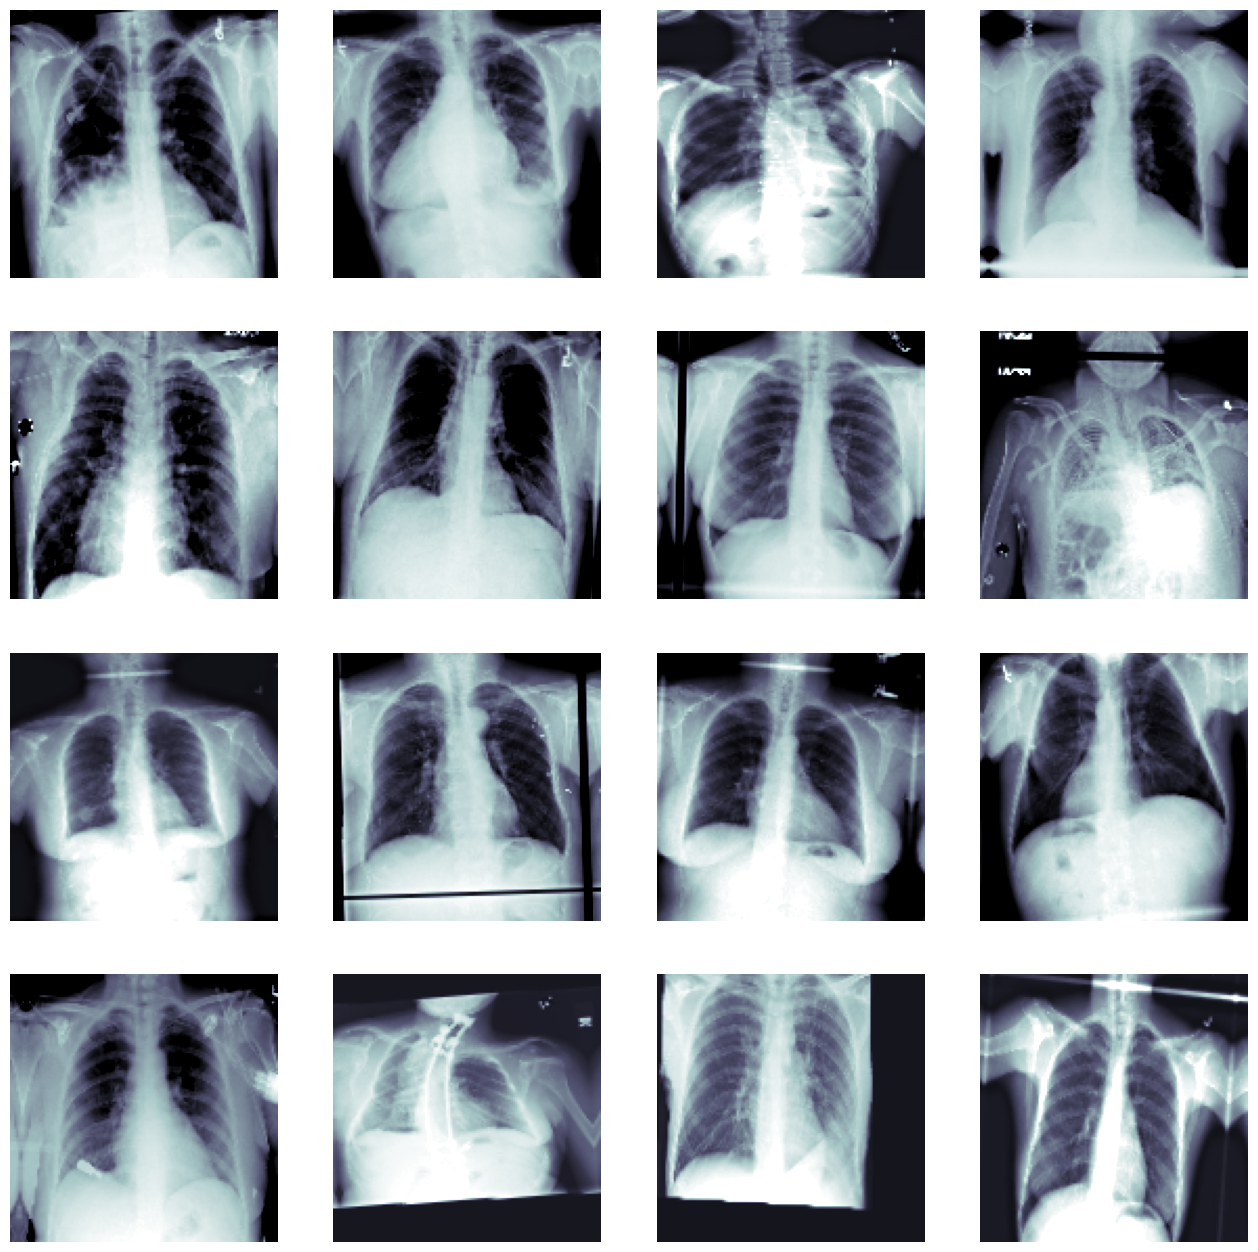

In [30]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y)
                             if n_score>0.5]))
    c_ax.axis('off')

In [31]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:],
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(15, activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
multi_disease_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228288   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                7

In [32]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=3)
callbacks_list = [checkpoint, early]

In [33]:
historico=multi_disease_model.fit_generator(train_gen,
                                  steps_per_epoch=2,
                                  validation_data = (test_X, test_Y),
                                  epochs = 10,
                                  callbacks = callbacks_list)


<ipython-input-33-bcb2e7fc5ee5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historico=multi_disease_model.fit_generator(train_gen,


Epoch 1/10
2/2 [==============================] - ETA: 0s - loss: 0.5658 - binary_accuracy: 0.7177 
Epoch 1: val_loss improved from inf to 0.67598, saving model to xray_class_weights.best.hdf5
2/2 [==============================] - 27s 2s/step - loss: 0.5658 - binary_accuracy: 0.7177 - val_loss: 0.6760 - val_binary_accuracy: 0.9246
Epoch 2/10
2/2 [==============================] - ETA: 0s - loss: 0.2416 - binary_accuracy: 0.9240
Epoch 2: val_loss improved from 0.67598 to 0.65440, saving model to xray_class_weights.best.hdf5
2/2 [==============================] - 2s 1s/step - loss: 0.2416 - binary_accuracy: 0.9240 - val_loss: 0.6544 - val_binary_accuracy: 0.9246
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 0.3259 - binary_accuracy: 0.9177
Epoch 3: val_loss improved from 0.65440 to 0.63361, saving model to xray_class_weights.best.hdf5
2/2 [==============================] - 2s 1s/step - loss: 0.3259 - binary_accuracy: 0.9177 - val_loss: 0.6336 - val_binary_accuracy: 0

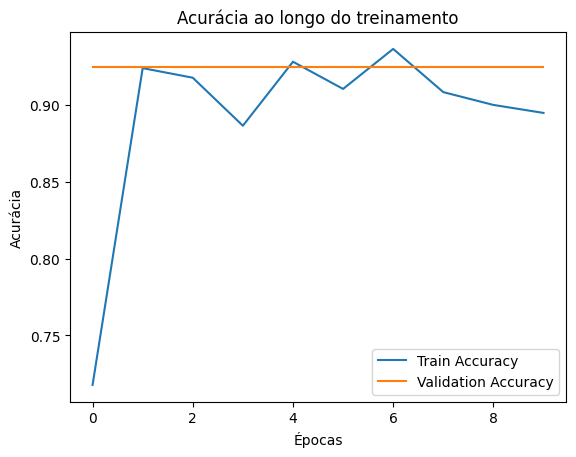

In [36]:
plt.plot(historico.history['binary_accuracy'], label='Train Accuracy')
plt.plot(historico.history['val_binary_accuracy'], label='Validation Accuracy')
plt.title('Acurácia ao longo do treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()